In [139]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scikitplot as skplot
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/telco_customer_churn.csv')
print(df.columns)
#print(df.head())


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [44]:
df.drop(['customerID'],axis=1)

df['MonthlyCharges']=pd.to_numeric(df['MonthlyCharges'],errors='coerce')
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

ini_array=df['TotalCharges'].values

#print(ini_array)
#insert an average for the missing total charges
res = np.where(np.isnan(ini_array), np.ma.array(ini_array, 
               mask = np.isnan(ini_array)).mean(axis = 0), ini_array)  

df['TotalCharges']=res

df['Churn']=df['Churn'].astype('category').cat.codes
df['gender']=df['gender'].astype('category').cat.codes
df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['Partner']=df['Partner'].astype('category').cat.codes
df['Dependents']=df['Dependents'].astype('category').cat.codes
df['PhoneService']=df['PhoneService'].astype('category').cat.codes
df['MultipleLines']=df['MultipleLines'].astype('category').cat.codes
df['InternetService']=df['InternetService'].astype('category').cat.codes

df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup']=df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection']=df['DeviceProtection'].astype('category').cat.codes
df['TechSupport']=df['TechSupport'].astype('category').cat.codes

df['StreamingTV']=df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies']=df['StreamingMovies'].astype('category').cat.codes
df['Contract']=df['Contract'].astype('category').cat.codes
df['PaperlessBilling']=df['PaperlessBilling'].astype('category').cat.codes
df['PaymentMethod']=df['PaymentMethod'].astype('category').cat.codes


In [60]:
def auc(variables, target, basetable):
    X = basetable[variables]
    y= basetable[target]

    logreg=LogisticRegression(max_iter=2000)
    logreg.fit(X,y.values.ravel())
    predictions=logreg.predict_proba(X)[:,1]
    auc=roc_auc_score(y, predictions)
    return auc

def next_best(current_variables, candidate_variables, target, basetable):
    best_auc=-1
    best_variable=None
    for v in candidate_variables:
        auc_v= auc(current_variables+[v],target, basetable)
        if auc_v >= best_auc:
            best_auc=auc_v
            best_variable=v
    return (best_variable,best_auc)

['tenure', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'PhoneService', 'TechSupport', 'TotalCharges', 'PaperlessBilling', 'OnlineBackup', 'SeniorCitizen', 'DeviceProtection', 'Dependents', 'PaymentMethod', 'InternetService', 'MultipleLines', 'gender', 'Partner', 'StreamingMovies', 'StreamingTV']


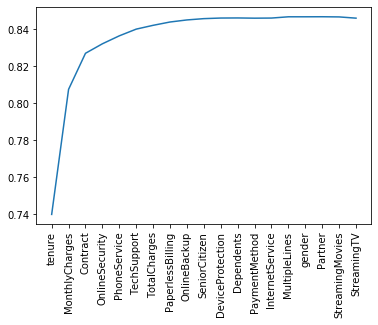

In [62]:
candidate_variables=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
current_variables=[]
auc_scores=[]
target=['Churn']
max_number_variables=len(candidate_variables)

number_iterations=min(max_number_variables, len(candidate_variables))

for i in range(0,number_iterations):
    next_variable,auc_variable= next_best(current_variables, candidate_variables, target, df)
    current_variables=current_variables+[next_variable]
    auc_scores=auc_scores+[auc_variable]
    candidate_variables.remove(next_variable)

print(current_variables)
x=np.array(range(0,len(auc_scores)))
y = np.array(auc_scores)
plt.xticks(x, current_variables, rotation = 90)
plt.plot(x,y)
plt.show()


[LibLinear]

Text(0, 0.5, 'TPR')

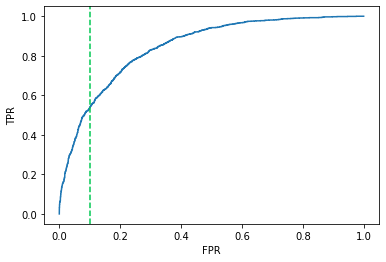

In [73]:
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]


y=df['Churn']

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, stratify = y, random_state = 42)
#L1 regularization called LASSO can be called explicitly, and this approach performs
#feature selection by shrinking some of the model coefficients to zero
lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, verbose = 3, warm_start = True)
lr.fit(X_train, y_train) 

ytrain_pred_probas = lr.predict_proba(X_train)[:, 1]   # prob of predict as 1
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})

_ = plt.figure()
plt.plot(roc.FPR, roc.TPR)
plt.axvline(0.1, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")



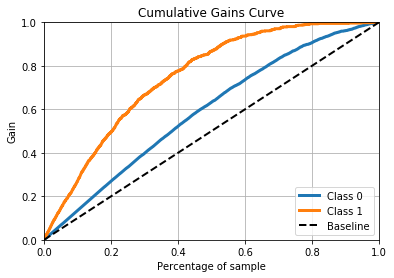

In [103]:
#predictions=lr.predict(X_test)
predictions=lr.predict_proba(X_test)

#print(predictions)
#print(type(predictions))
#print(type(y_test))
#predictions=pd.DataFrame(np.reshape(predictions,(-1,1)))
#true_values=pd.DataFrame(np.reshape(y_test.values,(-1,1)))
#print(true_values.shape)
#print(predictions.shape)
#print(type(true_values))
#print(type(predictions))
skplot.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predictions)
plt.show()

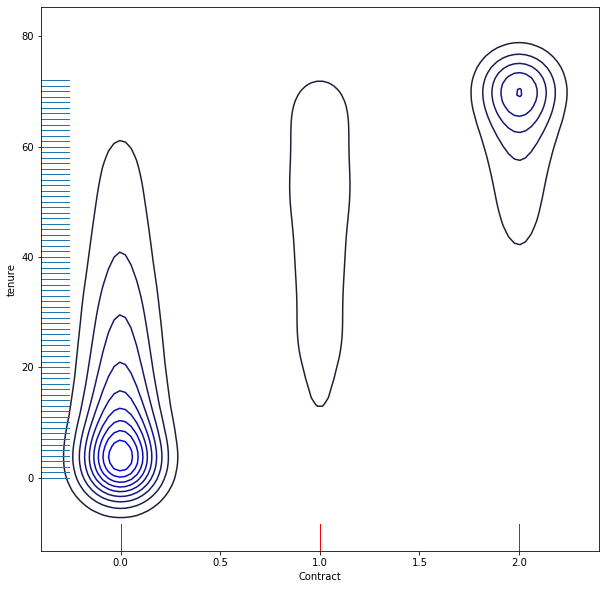

In [96]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df['Contract'], df['tenure'], color="b", ax=ax)

sns.rugplot(df['Contract'], color="r", ax=ax)
sns.rugplot(df['tenure'], vertical=True, ax=ax)

plt.show()

In [127]:
def profit(perc_target, perc_selected, population_size,cost_campaign, reward_target ):
    
    cost=cost_campaign * perc_selected* population_size
    reward=reward_target*perc_target*perc_selected*population_size
   
    return(reward-cost)

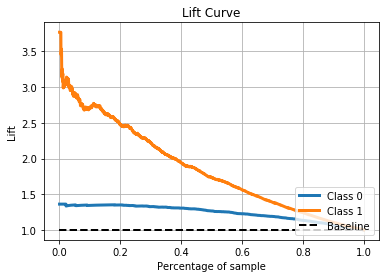

Overall profit is 40000.0


In [133]:
predictions=lr.predict_proba(X_test)
skplot.metrics.plot_lift_curve(y_true=y_test, y_probas=predictions)
plt.show()

lift=2.0
perc_selected = 0.4

population_size=100000
target_incidence=0.01
campaign_cost=1 #cost to save a churn
campaign_reward = 100  # reward to save a churn

profit_all = profit(target_incidence*lift, perc_selected, population_size, campaign_cost, campaign_reward)
print("Cost to same churn is {0}".format(profit_all))


Predicted churn count  509


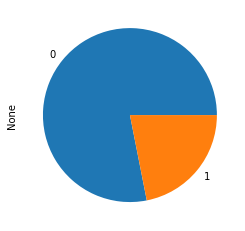

Test Accuracy is %s 80.04301075268818
Train Accuracy is %s 0.8037303942348453
Test Precision is %s 0.650294695481336
Train Precision is %s 0.6591796875
Test Recall is %s 0.5364667747163695
Train Recall is %s 0.5391373801916933


Text(0.5, 257.44, 'Predicted label')

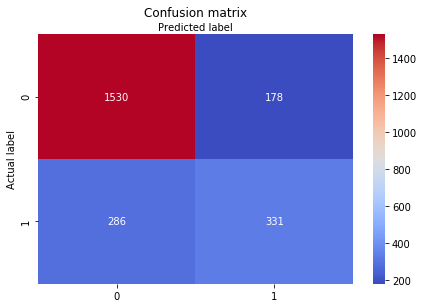

In [140]:
pred_test=lr.predict(X_test)

print("Predicted churn count ",len(pred_test[pred_test==1]))
buffer=pd.Series(pred_test)
buffer.value_counts().plot(kind='pie')
plt.show()

#print(confusion_matrix(y_test,y_pred))
# true positive     true negative
# false negative    false positive
print("Test Accuracy is %s",lr.score(X_test,y_test)*100)
pred_train=lr.predict(X_train)
print("Train Accuracy is %s",accuracy_score(y_train, pred_train))

print("Test Precision is %s",precision_score(y_test,pred_test))
print("Train Precision is %s",precision_score(y_train, pred_train))

print("Test Recall is %s",recall_score(y_test,pred_test))
print("Train Recall is %s",recall_score(y_train, pred_train))

confusion_matrix = confusion_matrix(y_test, pred_test)

class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')